In [1]:
%matplotlib inline
import importlib as imp
import matplotlib.pylab as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set_style('ticks');
current_colors = sns.color_palette()
sns.set_palette('Accent');

# Adjust all text and axes colors to black. default is some studip gray that appears to faint when printed 
from matplotlib import rc , rcParams
rc('axes',edgecolor='black')
rc('xtick',color='black',labelsize=15)
rc('ytick',color='black',labelsize=15)
rc('text',color='black')
rc('axes',labelcolor='black',linewidth=2.0)
rc('font',size=15)
#rcParams["patch.force_edgecolor"] = True

import Calculate_ABA_Finkelsteinlab_Diewertje as CalcABA
imp.reload(CalcABA);
import plotting_ABA_Diewertje as pltABA
imp.reload(pltABA);
import plotting_Boyle_Diewertje as plt_B
imp.reload(plt_B);

import sys 
sys.path.append('../code_general/')
import CRISPR_free_energy_landscape_Diewertje as FreeEnergy
imp.reload(FreeEnergy);
import read_model_ID;
imp.reload(read_model_ID);

import sys 
sys.path.append('../code_general_Finkelsteinlab/')
import plotting_Finkelsteinlab as plt_F
imp.reload(plt_F)


import analysis_SA_fits_Diewertje as SAfits
imp.reload(SAfits);



#  Step 1: Use SA fit to association data from Finkelstein et al.
Using simmulated annealing we minimise the χ2 based on the data with singly and doubly mismatched sequences. Here we show our best fit.

In [2]:
simset = []
no_good = []

chi_squared = [] 

#---------- collect simulations ---------------
for sim in range(1,40):
    sa = pd.read_csv('../Diewertje/1_3_2019/fit_1_3_2019_sim_' +str(sim)+'.txt', delimiter='\t', index_col=46)
    filename = '../Diewertje/1_3_2019/fit_1_3_2019_sim_' +str(sim) +'.txt'   
    chi_squared.append(sa.Potential.iloc[-1])
    simset.append(filename)
        
    
best_fit = simset[np.argmin(chi_squared)]
best_fit

'../Diewertje/1_3_2019/fit_1_3_2019_sim_25.txt'

In [3]:
# Load Parameters
model_id = 'init_limit_general_energies_v2'

# To find last line with the fitted parameters
f=open(best_fit)
lines=f.read().splitlines()
last_line=lines[-1]
last_line = last_line.split()
Finkel_params = list(map(float,last_line[:-2]))
print(Finkel_params)

# Nparams = (np.size(Finkel_params) #44
# boyle_params = plt_B.load_simm_anneal(filename, Nparams)

# To change epsilon PAM
Finkel_params_changed=Finkel_params
Finkel_params_changed[0]=3.5

[7.84077166544, -3.86169840271, -3.70797296422, 0.282127889957, 2.12893747436, 2.52116080564, -2.93590576501, 2.25359907985, -3.48368647438, 5.81691254266, 0.849412863521, 1.32195496791, -1.60120802092, 1.09234570332, -2.86686374925, 6.06630421592, -3.65885766385, -4.38584423539, 6.03362322181, -3.33636449186, 9.33451012576, 4.89101972696, 3.65950309269, 5.1593029047, 6.02514448615, 5.40122234623, 6.29709232982, 6.18106493587, 4.47000774555, 7.05508120451, 5.3661378075, 5.35935387339, 5.09490596507, 4.58985175342, 4.80259620263, 4.52821083752, 9.24759236086, 7.20185965495, 8.54354367169, 6.43557468511, 2.63051807811, -0.35536038639, -1.74160586913, 2.85409059582]


In [4]:
# Load data
IlyaData = pd.read_csv('../Data_ABA_Finkelsteinlab/cas9-target-e-replicate-1-delta-abas_Canonical_OT-r_0-2.csv')
IlyaData20 = pd.read_csv('../Data_ABA_Finkelsteinlab/cas9-target-e-replicate-1-delta-abas_Canonical_OT-r_0-20.csv')

# Prediction

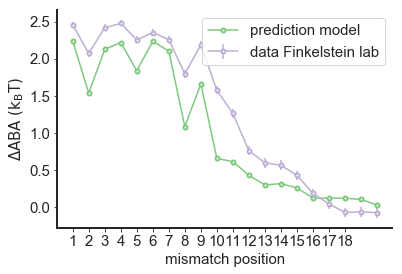

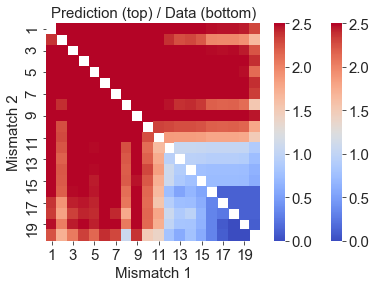

In [8]:
# ONly moddel fit
T=60*10
guide_length=20

plt.figure()
_ = pltABA.predict_single_mm(Finkel_params,model_id, T, guide_length, show_plot=True, show_data=True, data_file=IlyaData)
#plt.savefig('../reports/Skype_call_Ilya_10_12_2018/single_mm.pdf', format='pdf',bbox_inches='tight')

plt.figure()
_ = pltABA.predict_double_mm(Finkel_params,model_id,T, guide_length, show_plot=True, show_data=True, data_file=IlyaData)
#plt.savefig('../reports/Skype_call_Ilya_10_12_2018/double_mm_heatmap.pdf', format='pdf',bbox_inches='tight')


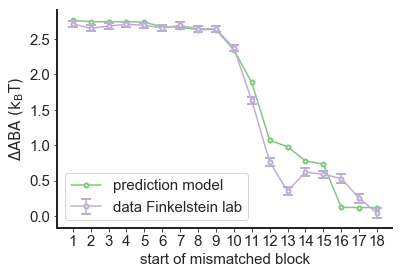

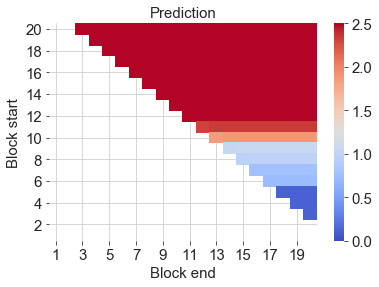

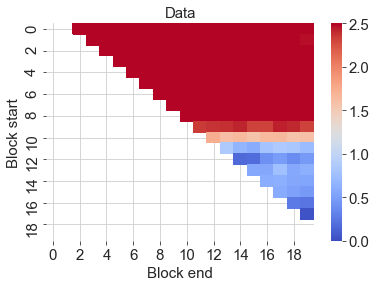

In [7]:
#### CANNOT DO THIS FOR DATA WITH ONLY 2 MUTATIONS DATA, SO USE 20 mutation data with parameters from 2 mutation data  #####

plt.figure()
_ = pltABA.predict_1D_mmblocks(Finkel_params, model_id, T, guide_length, show_plot=True, show_data=True, data_file=IlyaData20)

plt.figure()
_ = pltABA.predict_block_mismatches(Finkel_params, model_id, T,guide_length, show_plot=True, show_data=True, data_file=IlyaData20)

# In the two plot from above, we see that the length of the mismatch block does not matter, only the starting position!

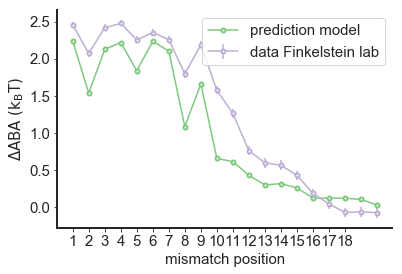

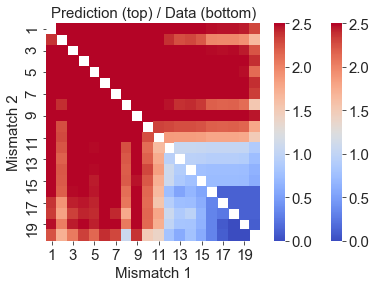

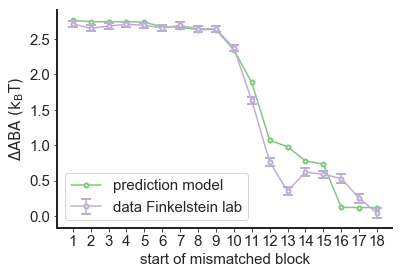

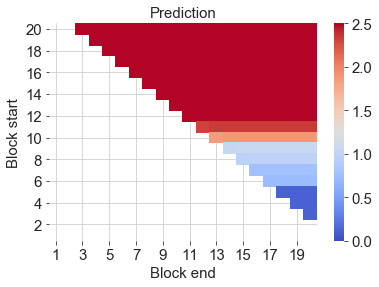

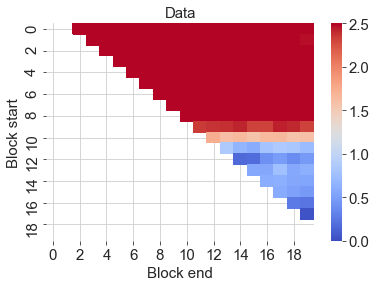

In [10]:
# With adapted PAM epsilon value

T=60*10
guide_length=20

plt.figure()
_ = pltABA.predict_single_mm(Finkel_params_changed,model_id, T, guide_length, show_plot=True, show_data=True, data_file=IlyaData)
#plt.savefig('../reports/Skype_call_Ilya_10_12_2018/single_mm.pdf', format='pdf',bbox_inches='tight')

plt.figure()
_ = pltABA.predict_double_mm(Finkel_params_changed,model_id,T, guide_length, show_plot=True, show_data=True, data_file=IlyaData)

#### CANNOT DO THIS FOR DATA WITH ONLY 2 MUTATIONS DATA, SO USE 20 mutation data with parameters from 2 mutation data  #####
plt.figure()
_ = pltABA.predict_1D_mmblocks(Finkel_params, model_id, T, guide_length, show_plot=True, show_data=True, data_file=IlyaData20)
plt.figure()
_ = pltABA.predict_block_mismatches(Finkel_params, model_id, T,guide_length, show_plot=True, show_data=True, data_file=IlyaData20)

# In the two plot from above, we see that the length of the mismatch block does not matter, only the starting position!

In [7]:
import sys 
sys.path.append('../code_general_Finkelsteinlab/')
import plotting_Finkelsteinlab as pltFink

_ = pltFink.plot_double_mut_data(IlyaData, 'Delta ABA (kBT)', 'r', Canonical=True, 
                                Ng=20, data_name='Finkelstein', Plot=True,logplot=False,
                                SaveFigures=False)

TypeError: 'map' object is not subscriptable

C:\Users\Diewertje\Python\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Users\Diewertje\Python\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


(array([ 0.        ,  3.5       ,  7.3616984 , 11.06967137, 10.78754348,
         8.658606  ,  6.1374452 ,  9.07335096,  6.81975188, 10.30343836,
         4.48652581,  3.63711295,  2.31515798,  3.916366  ,  2.8240203 ,
         5.69088405, -0.37542017,  3.2834375 ,  7.66928173,  1.63565851,
         4.972023  , -4.36248712]),
 array([ 3.5       ,  3.47918588,  3.47868077,  3.47801141,  3.47240251,
         3.40512115,  3.40167312,  3.36942344,  3.36844983,  3.08559828,
         2.6306597 ,  1.76737026,  1.65708083,  1.38604788,  1.37263514,
        -0.53593246, -0.55763683, -0.55790415, -0.66363146, -0.66719345,
        -4.38702378]))

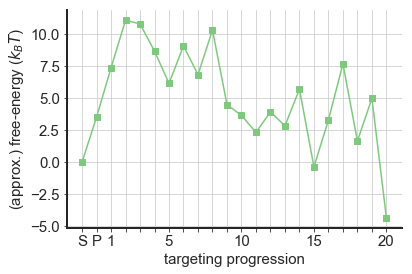

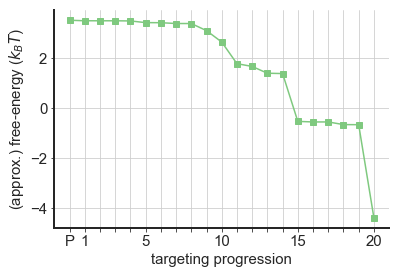

In [8]:
# With the changed PAM parameter
FreeEnergy.plot_free_energy_landscape(Finkel_params_changed,model_id,show_plot=True)

C:\Users\Diewertje\Python\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Users\Diewertje\Python\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


(array([ 0.        ,  3.5       ,  7.3616984 , 11.06967137, 10.78754348,
         8.658606  ,  6.1374452 ,  9.07335096,  6.81975188, 10.30343836,
         4.48652581,  3.63711295,  2.31515798,  3.916366  ,  2.8240203 ,
         5.69088405, -0.37542017,  3.2834375 ,  7.66928173,  1.63565851,
         4.972023  , -4.36248712]),
 array([ 3.5       ,  3.47918588,  3.47868077,  3.47801141,  3.47240251,
         3.40512115,  3.40167312,  3.36942344,  3.36844983,  3.08559828,
         2.6306597 ,  1.76737026,  1.65708083,  1.38604788,  1.37263514,
        -0.53593246, -0.55763683, -0.55790415, -0.66363146, -0.66719345,
        -4.38702378]))

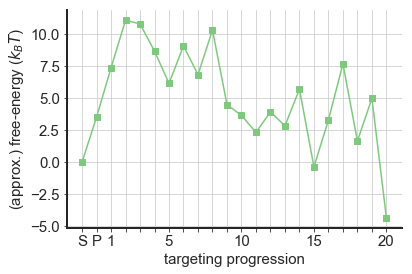

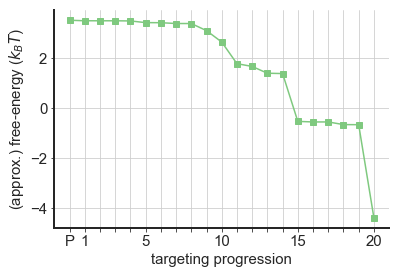

In [9]:
# With the original PAM epsilon
FreeEnergy.plot_free_energy_landscape(Finkel_params,model_id,show_plot=True)

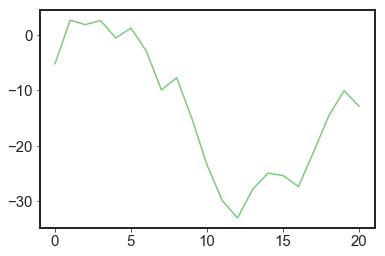

In [10]:
# To plot the energy landscape of the first parameters to see if it starts random

# Load First Parameters
f=open(best_fit)
lines=f.read().splitlines()
first_line=lines[1]
first_line = first_line.split()
Finkel_first_params = list(map(float,first_line[:-2]))

#To plot 
match=Finkel_first_params[:21]
plt.plot(-1*np.cumsum(match))

# Plots from characterising free-energy landscape Boyle (working for Finkelstein)
How certain are we about each fitted parameter value?

array([2.003359  , 0.71114907, 1.50066611, 0.4563609 , 0.97663303,
       0.95276442, 0.17025601, 0.71151596, 1.00692098, 0.84258153,
       1.06477549, 0.69459677, 1.54283092, 1.02476731, 0.42186291,
       0.52621689, 0.79890339, 0.88445238, 0.57113259, 0.2358213 ,
       0.14129219, 0.43179606, 0.43914053, 1.82521727, 0.        ,
       0.71950581, 0.60586145, 0.35172451, 1.28588191, 0.43259372,
       1.24768308, 0.03867809, 1.26498323, 0.46942089, 0.63816998,
       0.07596388, 1.50537567, 1.32788137, 1.4643416 ])

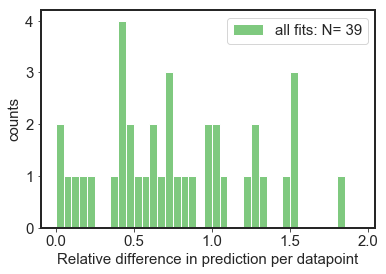

In [11]:
# To make the scores document
# The scores is how much the chi-squared value differs from the best fit chi-square
best = np.argmin(chi_squared)
scores=(chi_squared/chi_squared[best])-1

plt.hist(scores, bins=np.arange(0,2,0.05),label='all fits: N= '+str(len(scores)))

plt.legend(fontsize=15);
plt.xlabel('Relative difference in prediction per datapoint', fontsize=15);
plt.ylabel('counts', fontsize=15);
plt.xticks(fontsize=15);

plt.yticks(fontsize=15);
scores

C:\Users\Diewertje\Python\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\Diewertje\Python\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


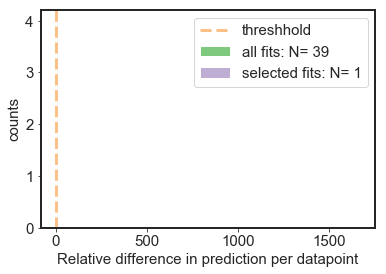

In [11]:
# This does exactly the same as above! To get scores
selected_sims, selected_scores, scores = SAfits.select_on_prediction(simset, 
                                                         chi_squared, 
                                                         percentage=0.05,
                                                         Nparams=44,
                                                         model_id='init_limit_general_energies_v2',
                                                         precalculated=False, 
                                                         score=None,
                                                         save_scores=False, 
                                                         filename='../data/25_10_2018/select_with_predcitions.txt'
                                                         )
plt.hist(scores, normed=False, bins=np.arange(0,max(scores),0.025), label='all fits: N= ' +str(len(scores)))
plt.hist(selected_scores,normed=False, bins=np.arange(0,max(scores),0.025), label='selected fits: N= ' +str(len(selected_scores)));

plt.axvline(0.05, linestyle='dashed', linewidth=3, color=sns.color_palette()[2], label='threshhold')


plt.legend(fontsize=15);
plt.xlabel('Relative difference in prediction per datapoint', fontsize=15);
plt.ylabel('counts', fontsize=15);
plt.xticks(fontsize=15);

plt.yticks(fontsize=15);

# WHY SHOULD NORMED BE ON????

In [12]:
# --- make selection --- 
#simset = selected_sims 

# --- store resulting fit parameters in a set of Dataframes --- 
matches, mismatches, rates, landscape, free_energy, fast_Rloop = SAfits.process_SA_fits(simset)
forward_rates = rates[['sol_to_PAM','PAM_to_R1','internal']]
matches.loc['../Diewertje/1_3_2019/fit_1_3_2019_sim_1.txt']

PAM    3.500000
1     -3.683401
2     -4.302167
3      6.025298
4     -4.363243
5     -3.378414
6      2.769149
7      4.329041
8     -2.461602
9      5.480452
10    -6.014882
11     2.858622
12    -6.984751
13     0.940302
14     5.264647
15     3.109862
16     6.845622
17     9.912359
18     3.303293
19     5.640550
20     3.034844
Name: ../Diewertje/1_3_2019/fit_1_3_2019_sim_1.txt, dtype: float64

C:\Users\Diewertje\Python\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


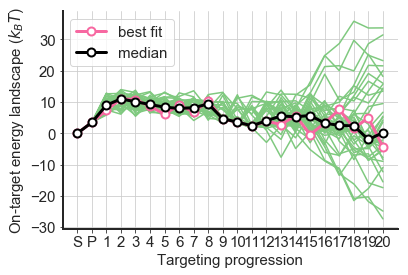

In [13]:
# --- (microscopic) free-energy landscape --- 
plt.figure()
Nparams=44
for filename in simset:
    parameters = plt_B.load_simm_anneal(filename, Nparams)
    parameters[0]=3.5 # if want to fix epsilon PAM
    Energy_landscape, FreeEnergy_landscape = FreeEnergy.plot_free_energy_landscape(parameters,model_id,show_plot=False);
    plt.plot(np.array(Energy_landscape),color=sns.color_palette()[0])
lowest_chi_squared = np.array( landscape.loc[best_fit] )


plt.plot(np.array(lowest_chi_squared), color='#f768a1' , 
             marker='o', 
             lw=3,
             markersize =8,
             markerfacecolor='white',
             markeredgewidth= 2,
        label='best fit');

LandscapeMED = landscape[landscape.columns[:]].median()
plt.plot(np.array(LandscapeMED),color='black' , 
             marker='o',
             lw=3,
             markersize =8,
             markerfacecolor='white',
             markeredgewidth= 2,
        label='median');

plt.legend(fontsize=15,frameon=True)
plt.xlim(-1,22)
plt.xticks(list(range(0,22)),['S','P']+list(LandscapeMED.index[2:]),  fontsize=15);
plt.yticks(fontsize=15);
plt.xlabel('Targeting progression',fontsize=15)
plt.ylabel('On-target energy landscape ($k_BT$)',fontsize=15)
plt.grid('on')
sns.despine();


In [ ]:
# ---- show fluctuations in parameter sets --- 

# --- Matches ---
# MAYBE WE WANT TO NEGATE (multiply by -1 all the epsilonC to have the same sign convention as EpsilonPAM and EpsilonI)
plt.figure()
for sim in simset:
    matches.loc[sim].plot(marker='o',markersize=10,linestyle='', color=sns.color_palette()[0], alpha=1.0,label='')

matches.median().plot(color='black',
            linestyle='',
             marker='_', 
             lw=4,
             markersize =20,
             markerfacecolor='white',
             markeredgewidth= 2,
        label='median')    

matches.loc[best_fit].plot(color='#f768a1',
            linestyle='',
             marker='o', 
             lw=3,
             markersize =8,
             markerfacecolor='white',
             markeredgewidth= 2,
        label='best fit')



plt.title('matches',fontsize=15)
plt.xticks(list(range(0,21)),['P']+list(range(1,21)),fontsize=15);
plt.xlim(-1,21);
plt.yticks(fontsize=15);
plt.ylabel('Energy ($k_BT$)',fontsize=15);
plt.legend(fontsize=15,frameon=True);

# --- Mismatches --- 
plt.figure()
for sim in simset:
    mismatches.loc[sim].plot(marker='o',markersize=10,linestyle='', color=sns.color_palette()[0], alpha=1.0,label='')

mismatches.median().plot(color='black',
            linestyle='',
             marker='_', 
             lw=4,
             markersize =20,
             markerfacecolor='white',
             markeredgewidth= 2,
        label='median')    
    

mismatches.loc[best_fit].plot(color='#f768a1',
            linestyle='',
             marker='o', 
             lw=3,
             markersize =8,
             markerfacecolor='white',
             markeredgewidth= 2,
        label='best fit')



plt.title('mismatches',fontsize=15)
plt.xticks(list(range(0,21)),['P']+list(range(1,21)),fontsize=15);
plt.xlim(-1,21);
plt.yticks(fontsize=15);
plt.ylabel('Energy ($k_BT$)',fontsize=15);
plt.legend(fontsize=15,frameon=True);


# The worst fit

In [ ]:
worst_fit = simset[np.argmax(chi_squared)]
worst_fit

In [ ]:
# Load Parameters
model_id = 'init_limit_general_energies_v2'

# To find last line with the fitted parameters
f=open(worst_fit)
lines=f.read().splitlines()
last_line=lines[-1]
last_line = last_line.split()
Finkel_params_changed = list(map(float,last_line[:-2]))
print(Finkel_params_changed)

# With adapted PAM epsilon value

T=60*10
guide_length=20

plt.figure()
_ = pltABA.predict_single_mm(Finkel_params_changed,model_id, T, guide_length, show_plot=True, show_data=True, data_file=IlyaData)
#plt.savefig('../reports/Skype_call_Ilya_10_12_2018/single_mm.pdf', format='pdf',bbox_inches='tight')

plt.figure()
_ = pltABA.predict_double_mm(Finkel_params_changed,model_id,T, guide_length, show_plot=True, show_data=True, data_file=IlyaData)
#plt.savefig('../reports/Skype_call_Ilya_10_12_2018/double_mm_heatmap.pdf', format='pdf',bbox_inches='tight')

# The data part is not plotted since I need the new plotting function for the data Barouz made -> Do this later

#### CANNOT DO THIS FOR DATA WITH ONLY 2 MUTATIONS DATA, SO USE 20 mutation data with parameters from 2 mutation data  #####
# Werkt wel in python 2, niet in python 3
# plt.figure()
# _ = pltABA.predict_1D_mmblocks(Finkel_params, model_id, T, guide_length, show_plot=True, show_data=True, data_file=IlyaData20)
# # #plt.savefig('../reports/Skype_call_Ilya_10_12_2018/blocks_collapse_first_position.pdf', format='pdf',bbox_inches='tight')

# plt.figure()
# _ = pltABA.predict_block_mismatches(Finkel_params, model_id, T,guide_length, show_plot=True, show_data=True, data_file=IlyaData20)

# In the two plot from above, we see that the length of the mismatch block does not matter, only the starting position!